# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv('mapbox.env')

True

In [3]:
map_box_api = os.getenv("mapbox")

## Load Data

In [53]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [54]:
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 

sfo_data_by_year = (
    sfo_data[["housing_units"]]
    .groupby("year")
    .mean()
)

sfo_data_by_year

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [7]:
# Save the dataframe as a csv file
import csv
sfo_data_by_year.to_csv('Data/housing_units_year.csv')


<AxesSubplot:title={'center':'Housing Units in San Francisco from 2010 to 2016'}, xlabel='year'>

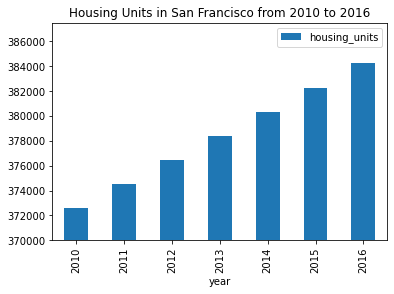

In [8]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.


sfo_data_by_year.plot.bar(y='housing_units', title='Housing Units in San Francisco from 2010 to 2016', ylim=(370000, 387500) )

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


In [10]:
# Calculate the average sale price per square foot and average gross rent per year
sfo_data_rent_sqf = (
    sfo_data[["sale_price_sqr_foot","gross_rent"]]
    .groupby("year")
    .mean()
    .sort_values("year")
)

sfo_data_rent_sqf

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


<AxesSubplot:title={'center':'Average Gross Rent by Year'}, xlabel='year'>

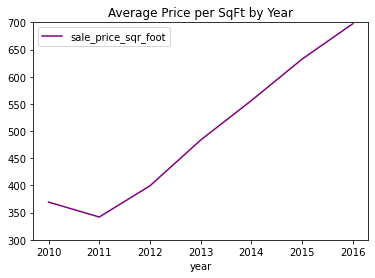

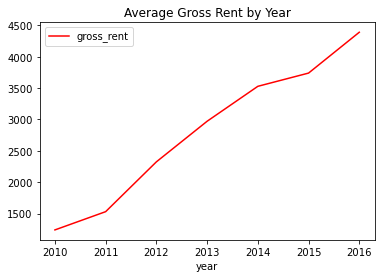

In [11]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot

sfo_data_rent_sqf.plot.line(y='sale_price_sqr_foot', title='Average Price per SqFt by Year', ylim=(300, 700),color='purple' )

# Line chart for average montly rent
sfo_data_rent_sqf.plot.line(y='gross_rent', title='Average Gross Rent by Year',color='red')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [12]:
# Group by year and neighborhood and then create a new dataframe of the mean values

sfo_data_by_Neighborhood =sfo_data.groupby(['year','neighborhood']).mean()
sfo_data_by_Neighborhood.reset_index(inplace=True)
sfo_data_by_Neighborhood  

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [13]:
#Checking for duplicated data
sfo_data_by_Neighborhood.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Length: 397, dtype: bool

In [14]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
sfo_data_by_Neighborhood.hvplot.line(y='sale_price_sqr_foot', x='year', groupby='neighborhood', title='Average Sale Price/sqft by Neigborhood in San Francisco')


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [32]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

sfo_data_by_Neighborhood.hvplot.line(y='gross_rent', x='year', groupby='neighborhood', title='Average Gross Rent by Neigborhood in San Francisco')



:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [33]:
# Getting the data from the top 10 expensive neighborhoods to own

sfo_data_by_Neighborhood_top10 = sfo_data.groupby('neighborhood').mean()
sfo_data_by_Neighborhood_top10.sort_values(by=['sale_price_sqr_foot'], ascending=False, inplace=True)
sfo_data_by_Neighborhood_top10.reset_index(inplace=True)
sfo_top10 = sfo_data_by_Neighborhood_top10[0:10]
sfo_top10



,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [34]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_top10.hvplot.bar(y='sale_price_sqr_foot', ylabel='Sale Price per sqft', x='neighborhood', title='Top Most Expensive Neighborhoods in San Francisco', 
                     width=900, height=400,rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [43]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
#sfo_data_by_Neighborhood.set_index('year')
sfo_data_sales_rent =sfo_data.groupby(['year','neighborhood']).mean()
sfo_data_sales_rent.reset_index(inplace=True)
sfo_data_sales_rent

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


In [44]:
sfo_data_sales_rent.hvplot.bar(stacked = False, height = 500, groupby="neighborhood", title='Purchase Cost vs Rental Income in San Francisco by Neighborhood', rot=90)

:DynamicMap   [neighborhood]
   :Bars   [index,Variable]   (value)

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [124]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_coordinates = pd.read_csv(file_path)
neighborhood_coordinates.set_index('Neighborhood')
#neighborhood_coordinates.reset_index(inplace=True)

rename_columns = ['neighborhood', 'lat', 'lon']
neighborhood_coordinates.columns= rename_columns
neighborhood_coordinates.set_index('neighborhood')


,lat,lon
neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [106]:
# Calculate the mean values for each neighborhood
sfo_data_by_Neighborhood_ave = sfo_data.groupby('neighborhood').mean()
sfo_data_by_Neighborhood_ave.reset_index(inplace=True)
sfo_data_by_Neighborhood_ave

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...
68,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,687.087575,382295.00,3959.000000


In [122]:
sfo_data_by_Neighborhood_ave.set_index('neighborhood')


,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [126]:
# Join the average values with the neighborhood locations
combined_sfo_data =( pd.concat([neighborhood_coordinates, sfo_data_by_Neighborhood_ave], axis='columns', join='inner' ))

combined_sfo_data   

,neighborhood,lat,lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,Westwood Park,687.087575,382295.00,3959.000000


In [102]:


combined_sfo_data =( pd.concat([neighborhood_coordinates, sfo_data_by_Neighborhood], axis='columns', join='inner' ))

combined_sfo_data    

,neigborhood,lat,lon,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2010,Alamo Square,291.182945,372560,1239
1,Anza Vista,37.779598,-122.443451,2010,Anza Vista,267.932583,372560,1239
2,Bayview,37.734670,-122.401060,2010,Bayview,170.098665,372560,1239
3,Bayview Heights,37.728740,-122.410980,2010,Buena Vista Park,347.394919,372560,1239
4,Bernal Heights,37.728630,-122.443050,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,2011,Croker Amazon,145.853380,374507,1530
69,Western Addition,37.792980,-122.435790,2011,Diamond Heights,382.352261,374507,1530
70,Westwood Highlands,37.734700,-122.456854,2011,Downtown,234.281624,374507,1530
71,Westwood Park,37.734150,-122.457000,2011,Duboce Triangle,295.779378,374507,1530


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

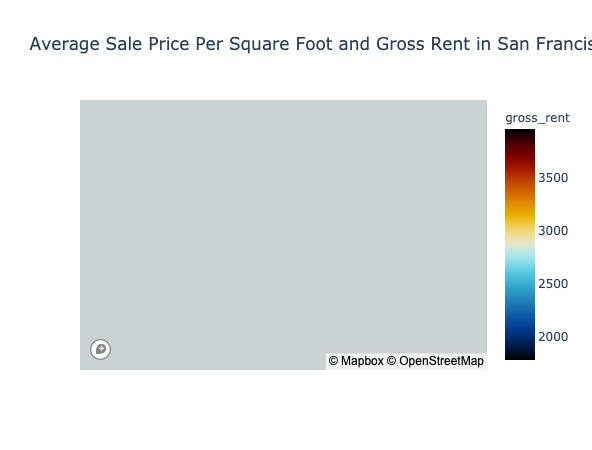

In [19]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


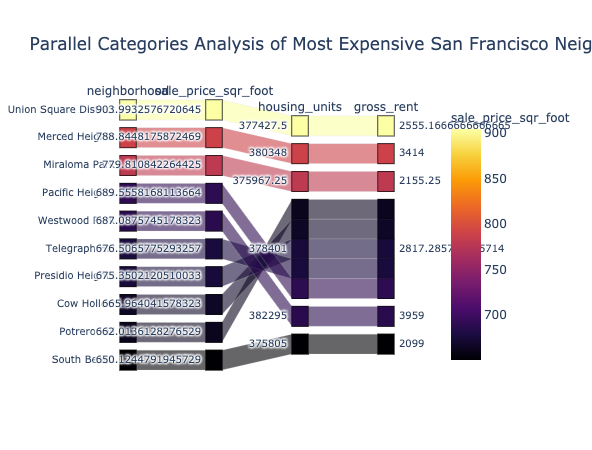

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

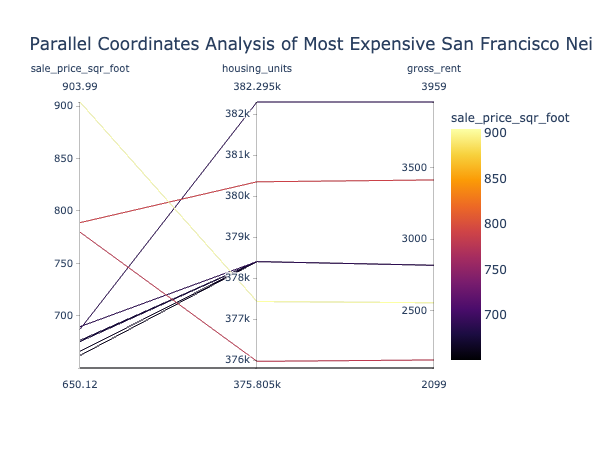

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

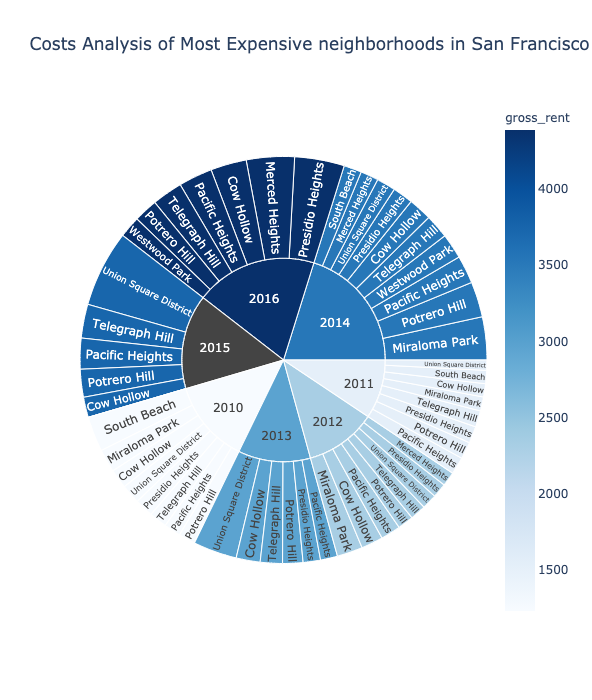

In [23]:
# Sunburst Plot
# YOUR CODE HERE!